Problem Statement: - 

The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.


----------------------------------------------------------------------------------------------------------------------------------------------------------
Business Objectives :

Identify Customer Purchase Patterns: Understand which products are frequently bought together to enhance product placement and inventory management.

Optimize Marketing Strategies: Use insights from association rules to design targeted marketing campaigns, such as cross-promotions and bundled discounts, aimed at increasing sales.

Improve Inventory Management: By recognizing which items are commonly purchased together, the store can optimize stock levels and avoid overstocking or stockouts.

Enhance Customer Experience: Create a more personalized shopping experience by suggesting related products to customers based on their purchase history.

Increase Sales Revenue: Leverage insights to drive sales through strategic promotions and by encouraging customers to buy complementary products.

--------------------------------------------------------------------------------------------------------------------------------------------------------
Constraints :

Several constraints may impact the analysis and implementation of the insights gained from Association Rules:

Data Quality and Availability: The effectiveness of Association Rules relies on high-quality, comprehensive transaction data. Missing or inaccurate data can lead to misleading insights.

Data Privacy Regulations: Compliance with regulations regarding customer data privacy (such as GDPR or CCPA) is essential. Any analysis must respect customer confidentiality and data protection laws.

Budget Constraints: Limited financial resources may restrict the ability to implement marketing campaigns or promotions based on the findings.

Technical Expertise: The store may require skilled personnel to analyze the data and interpret the results effectively. A lack of expertise can hinder the implementation of data-driven strategies.

Consumer Behavior Variability: Customer preferences and purchasing behavior can change due to external factors (e.g., seasonal trends, economic conditions). This variability may affect the relevance of the rules over time.

Implementation Challenges: Translating data insights into actionable strategies may face operational challenges, such as staff training, technology adoption, and customer acceptance.

In [4]:
#First import all the libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [18]:
#load dataset
df=pd.read_csv('groceries.csv', on_bad_lines='skip')
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,NaN,NaN,NaN


In [22]:
transactions=[]
transactions.append(df.keys().tolist())

In [24]:
transactions.extend(df.values.tolist())

In [26]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee', nan],
 ['whole milk', nan, nan, nan],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns', nan, nan, nan],
 ['pot plants', nan, nan, nan],
 ['whole milk', 'cereals', nan, nan],
 ['beef', nan, nan, nan],
 ['frankfurter', 'rolls/buns', 'soda', nan],
 ['chicken', 'tropical fruit', nan, nan],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice', nan, nan, nan],
 ['packaged fruit/vegetables', nan, nan, nan],
 ['chocolate', nan, nan, nan],
 ['specialty bar', nan, nan, nan],
 ['other vegetables', nan, nan, nan],
 ['butter milk', 'pastry', nan, nan],
 ['whole milk', nan, nan, nan],
 ['bottled water', 'canned beer', nan, nan],
 ['yogurt', nan, nan, nan],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables', nan, nan, nan],
 ['y

In [28]:
#removing nan values from the list
transactions=[[item for item in sublist if not pd.isna(item)] for sublist in transactions]
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['bottled water', 'canned beer'],
 ['yogurt'],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables'],
 ['yogurt', 'beverages', 'bottled water', 'specialty bar'],
 ['beef', 'grapes', 'detergent'],
 ['pastry', 'soda'],
 ['fruit/vegetable juice'],
 ['canned beer'],
 ['root vegetables', 'other vegetables', 'whole milk', 'dessert'],
 ['cit

In [30]:
#step1:convert the dataset into a format suitable for Apriori
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
#step2:Apply the apriori algorithm to find frequent itemsets
frequent_itemsets=apriori(df,min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.003112,(Instant food products)
1,0.015558,(UHT-milk)
2,0.001310,(artif. sweetener)
3,0.004913,(baking powder)
4,0.001146,(bathroom cleaner)
...,...,...
511,0.001146,"(fruit/vegetable juice, rolls/buns, sausage)"
512,0.001146,"(whole milk, rolls/buns, other vegetables)"
513,0.001310,"(whole milk, other vegetables, root vegetables)"
514,0.001146,"(whole milk, other vegetables, soda)"


In [42]:
#step3:Generate association rules from the frequent itemsets
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [44]:
#step4:Output the results
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                         itemsets
0    0.003112                          (Instant food products)
1    0.015558                                       (UHT-milk)
2    0.001310                               (artif. sweetener)
3    0.004913                                  (baking powder)
4    0.001146                               (bathroom cleaner)
..        ...                                              ...
511  0.001146     (fruit/vegetable juice, rolls/buns, sausage)
512  0.001146       (whole milk, rolls/buns, other vegetables)
513  0.001310  (whole milk, other vegetables, root vegetables)
514  0.001146             (whole milk, other vegetables, soda)
515  0.003439                      (rolls/buns, sausage, soda)

[516 rows x 2 columns]


In [46]:
print("\nAssociation Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']])



Association Rules:
            antecedents            consequents   support  confidence      lift
0            (UHT-milk)        (bottled water)  0.001965    0.126316  1.899715
1       (bottled water)             (UHT-milk)  0.001965    0.029557  1.899715
2            (UHT-milk)               (coffee)  0.001310    0.084211  2.496065
3              (coffee)             (UHT-milk)  0.001310    0.038835  2.496065
4            (UHT-milk)                 (soda)  0.002129    0.136842  1.080929
..                  ...                    ...       ...         ...       ...
447  (rolls/buns, soda)              (sausage)  0.003439    0.192661  4.001311
448     (sausage, soda)           (rolls/buns)  0.003439    0.500000  3.964935
449        (rolls/buns)        (sausage, soda)  0.003439    0.027273  3.964935
450           (sausage)     (rolls/buns, soda)  0.003439    0.071429  4.001311
451              (soda)  (rolls/buns, sausage)  0.003439    0.027167  2.022939

[452 rows x 5 columns]


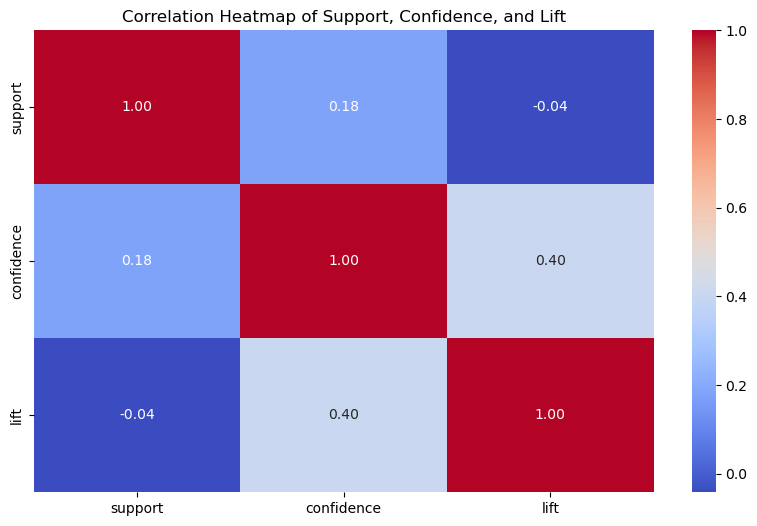

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(rules[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Support, Confidence, and Lift')
plt.show()

The implementation of Association Rule Learning in the departmental store provides significant benefits by uncovering customer purchasing patterns. This enables targeted cross-selling and personalized marketing strategies, leading to increased sales revenue. Improved inventory management is achieved through better stock optimization, reducing the risk of stockouts and excess inventory. The solution enhances customer experience by offering tailored product recommendations and streamlined shopping. Additionally, data-driven decision-making informs strategic planning and marketing effectiveness, fostering customer loyalty and retention. Overall, this approach positions the store competitively in the market, promoting sustainable growth and enhancing its brand reputation.






